In [15]:
import cv2
import supervision as sv            # converter for TOLO result
from ultralytics import YOLO        # YOLO lib
import matplotlib.pyplot as plt

In [2]:
model = YOLO("yolo11m.pt")

In [62]:
def detect_and_draw(img):
    res = model.predict([img])
    detections = sv.Detections.from_ultralytics(res[0])
    
    dimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for d in detections:
        box = d[0]
        conf = d[2]
        class_code = d[3]
        class_name = d[5]['class_name']
        
        cv2.rectangle(dimg, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 0, 255), 2)
        cv2.putText(dimg, class_name, (int(box[0]), int(box[3]+25)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    plt.imshow(dimg)
    plt.show()


0: 384x640 5 persons, 1 sports ball, 223.1ms
Speed: 3.0ms preprocess, 223.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


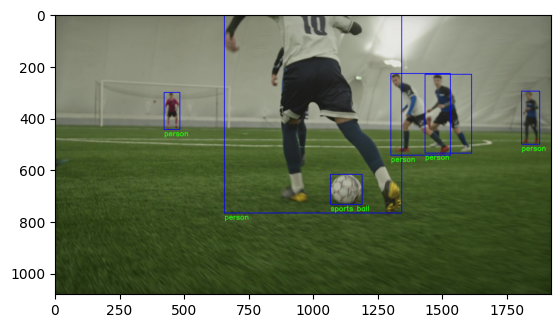

In [63]:
img1 = cv2.imread('inputs/image_01.jpg')
detect_and_draw(img1)


0: 384x640 2 persons, 232.7ms
Speed: 2.0ms preprocess, 232.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


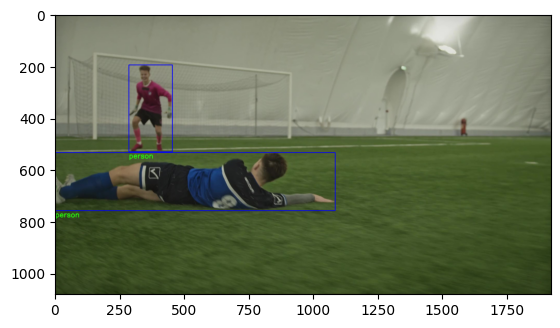

In [64]:
img2 = cv2.imread('inputs/image_02.jpg')
detect_and_draw(img2)


0: 384x640 12 boats, 3 surfboards, 272.7ms
Speed: 3.5ms preprocess, 272.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


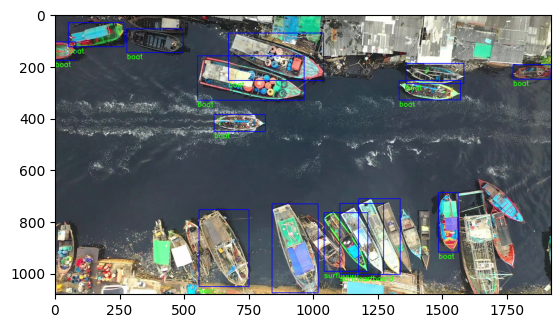

In [65]:
img3 = cv2.imread('inputs/image_03.jpg')
detect_and_draw(img3)


0: 544x640 13 persons, 1 bicycle, 1 backpack, 1 handbag, 345.7ms
Speed: 2.6ms preprocess, 345.7ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)


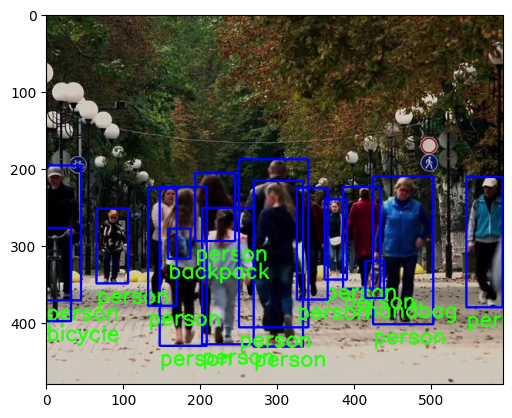

In [66]:
img4 = cv2.imread('inputs/image_04.jpg')
detect_and_draw(img4)